# item 1 - Get data
Parse the groundtruth information into a dictionary and a pandas table

In [1]:
#!/usr/bin/python
# -*- coding: utf-8 -*-

%matplotlib inline

import numpy as np
import os, sys
import imageio
import pandas as pd
import matplotlib.pyplot as plt

path_txt = os.path.join('dataset', 'train', 'gt')
path_mask = os.path.join('dataset', 'train', 'mask')

dirs_txt = os.listdir(path_txt)
dirs_mask = os.listdir(path_mask)

data = dict()

for gt in dirs_txt:
    with open(os.path.join(path_txt, gt)) as f:
        lines = f.readlines()
        
        im_name = gt.replace('gt', 'mask').replace('txt', 'png')
        im_open = (imageio.imread(os.path.join(path_mask, im_name)))

        lista = list()
        
        # Extract grountruth information
        for l in lines:
            tly, tlx, bry, brx, tipo = l.split(' ')  
            tly, tlx, bry, brx = map(float, [tly, tlx, bry, brx])
            d = dict()
            d['type'] = tipo.strip()
            
            w = brx - tlx
            h = bry - tly
            
            d['width'] = w
            d['height'] = h
            d['bbox_area'] = w*h
            d['form_factor'] = w/h
            
            d['tly'] = round(tly)
            d['tlx'] = round(tlx)
            d['bry'] = round(bry)
            d['brx'] = round(brx)
            
            sub_mask = im_open[d['tly']:d['bry'], d['tlx']:d['brx']]
            mask_area = np.count_nonzero(sub_mask)
            d['mask_area'] = mask_area
            d['filling_ratio'] = mask_area / d['bbox_area']
            
            lista.append(d)
            
        data[gt] = lista
    

In [2]:
# Show information in pandas format
columns = ['type','width','height','form_factor','bbox_area','mask_area','filling_ratio']
df = pd.DataFrame.from_dict({(i,n): data[i][n]
                        for i in data.keys()
                        for n,v in enumerate(data[i])}, columns=columns, orient='index').sort_values(['type'])
#print(df)
#df['form_factor'].plot(figsize=(10, 7))

In [3]:
# Statistical calculations
type_counts = df.groupby('type').aggregate(np.std).round(2)
type_counts

#type_counts = df.groupby('type').aggregate(np.median)
#type_counts = df.groupby('type').aggregate(np.average)
#type_counts = df.groupby('type').aggregate(np.std)

,width,height,form_factor,bbox_area,mask_area,filling_ratio
type,,,,,,
A,41.34,38.01,0.07,8279.86,4143.27,0.00
B,23.77,30.35,0.15,4742.37,2355.83,0.00
C,46.25,43.71,0.11,11043.92,8649.41,0.00
D,34.47,32.73,0.08,6220.39,5094.72,0.05
E,38.36,42.53,0.10,9622.29,7538.82,0.00
F,40.54,39.20,0.18,9245.58,9209.60,0.01


In [4]:
# Group data by "type" (letter) and get statistics:

# Function = get_stats (only shape, aspect ratio, etc, NOT COLOUR)

# Queremos estadisticas de tamaño y forma en función de cada letra        

# Item 2 - Split training dataset

Extract the 30% of the training images of each class to set up a validation dataset

A    103
B     14
C     47
D     71
E     38
F    120
Name: type, dtype: int64


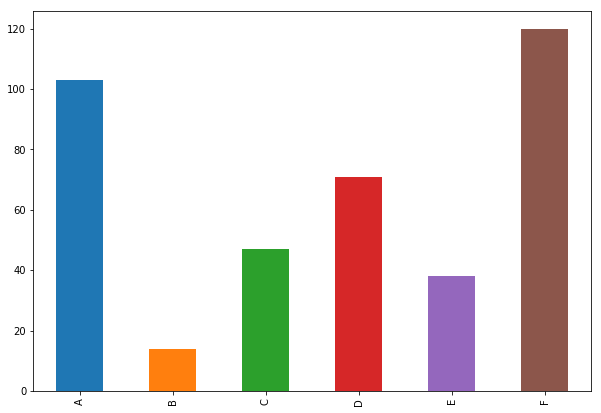

In [5]:
# Count number of signals per class
n_signals = df['type'].value_counts(sort=False).reindex(['A','B','C','D','E','F'])
print(n_signals)

# Plot
df['type'].value_counts(sort=False).reindex(['A','B','C','D','E','F']).plot(figsize=(10, 7),kind='bar',sort_columns=True)

In [6]:
# Get only one class
df_filtered = df[df['type'] == "B"]
df_filtered

,,type,width,height,form_factor,bbox_area,mask_area,filling_ratio
gt.01.001223.txt,0,B,57.14,48.18,1.185969,2753.0052,1372,0.498364
gt.01.001222.txt,0,B,52.52,44.96,1.168149,2361.2992,1157,0.489984
gt.01.003462.txt,0,B,106.70,96.34,1.107536,10279.4780,5093,0.495453
gt.00.001768.txt,0,B,80.61,87.42,0.922100,7046.9262,3482,0.494116
gt.00.001766.txt,0,B,120.82,121.22,0.996700,14645.8004,7220,0.492974
gt.00.004563.txt,0,B,64.70,62.74,1.031240,4059.2780,2009,0.494916
gt.00.004564.txt,0,B,62.26,57.36,1.085425,3571.2336,1767,0.494787
gt.00.004565.txt,0,B,70.10,68.38,1.025154,4793.4380,2345,0.489210
gt.00.000978.txt,0,B,90.09,78.75,1.144000,7094.5875,3505,0.494039
gt.00.000977.txt,0,B,69.94,62.47,1.119577,4369.1518,2156,0.493460


In [12]:
df_sorted_train = df_filtered.sample(frac=0.7)
df_sorted_train

,,type,width,height,form_factor,bbox_area,mask_area,filling_ratio
gt.00.001527.txt,0,B,89.52,117.28,0.763302,10498.9056,5170,0.492432
gt.00.001768.txt,0,B,80.61,87.42,0.922100,7046.9262,3482,0.494116
gt.00.001526.txt,0,B,123.23,149.01,0.826991,18362.5023,9164,0.499061
gt.00.000979.txt,0,B,111.84,99.60,1.122892,11139.2640,5469,0.490966
gt.01.003462.txt,0,B,106.70,96.34,1.107536,10279.4780,5093,0.495453
gt.00.001766.txt,0,B,120.82,121.22,0.996700,14645.8004,7220,0.492974
gt.01.001222.txt,0,B,52.52,44.96,1.168149,2361.2992,1157,0.489984
gt.00.004564.txt,0,B,62.26,57.36,1.085425,3571.2336,1767,0.494787
gt.00.004565.txt,0,B,70.10,68.38,1.025154,4793.4380,2345,0.489210
gt.00.001528.txt,0,B,72.41,96.46,0.750674,6984.6686,3456,0.494798


In [13]:
# Save train selection
tuple(zip(df_sorted_train.index.get_level_values(0).tolist(),df_sorted_train.index.get_level_values(1).tolist()))


(('gt.00.001527.txt', 0),
 ('gt.00.001768.txt', 0),
 ('gt.00.001526.txt', 0),
 ('gt.00.000979.txt', 0),
 ('gt.01.003462.txt', 0),
 ('gt.00.001766.txt', 0),
 ('gt.01.001222.txt', 0),
 ('gt.00.004564.txt', 0),
 ('gt.00.004565.txt', 0),
 ('gt.00.001528.txt', 0))

In [14]:
# Delete train selection to get validation selection
df_sorted_test = pd.concat([df_filtered,df_sorted_train]).drop_duplicates(keep=False)
tuple(zip(df_sorted_test.index.get_level_values(0).tolist(),df_sorted_test.index.get_level_values(1).tolist()))

(('gt.01.001223.txt', 0),
 ('gt.00.004563.txt', 0),
 ('gt.00.000978.txt', 0),
 ('gt.00.000977.txt', 0))

Functions to do all the process in one cell

In [17]:
def split_class(signal_class, train_percentage):
    
    # Choose one signal class
    df_filtered = df[df['type'] == signal_class]
    
    # Sample randomly the percentage choosen
    df_sorted_train = df_filtered.sample(frac=train_percentage)
    
    # Save train selection
    train_images = tuple(zip(df_sorted_train.index.get_level_values(0).tolist(),df_sorted_train.index.get_level_values(1).tolist()))
    
    # Delete train selection to get validation selection
    df_sorted_test = pd.concat([df_filtered,df_sorted_train]).drop_duplicates(keep=False)
    val_images = tuple(zip(df_sorted_test.index.get_level_values(0).tolist(),df_sorted_test.index.get_level_values(1).tolist()))
    
    return train_images, val_images

def split_dataset(data,percentage, classes):
    
    train_images = []
    val_images = []
    
    for signal_class in classes:
        temp_train_images, temp_val_images = split_class(signal_class, percentage)
        train_images += temp_train_images
        val_images += temp_val_images
    return train_images, val_images


classes = ['A','B','C','D','E','F']
train_images, val_images = split_dataset(data, 0.7, classes)
#print(train_images)
#print(val_images)
    

[('gt.00.005086.txt', 0), ('gt.01.001375.txt', 0), ('gt.01.001372.txt', 0), ('gt.00.005265.txt', 0), ('gt.01.001327.txt', 1), ('gt.01.001329.txt', 1), ('gt.01.001787.txt', 0), ('gt.01.001346.txt', 0), ('gt.01.001709.txt', 0), ('gt.01.001775.txt', 0), ('gt.01.001355.txt', 0), ('gt.01.002811.txt', 0), ('gt.01.002226.txt', 0), ('gt.01.001349.txt', 0), ('gt.01.002659.txt', 0), ('gt.01.001601.txt', 0), ('gt.01.002225.txt', 0), ('gt.01.001008.txt', 0), ('gt.01.001797.txt', 0), ('gt.01.001376.txt', 0), ('gt.01.001566.txt', 0), ('gt.01.001345.txt', 0), ('gt.01.001522.txt', 0), ('gt.01.001467.txt', 0), ('gt.01.001373.txt', 0), ('gt.01.001327.txt', 0), ('gt.01.002047.txt', 0), ('gt.01.001789.txt', 0), ('gt.01.001354.txt', 0), ('gt.01.002170.txt', 0), ('gt.01.000958.txt', 0), ('gt.01.002071.txt', 0), ('gt.01.001798.txt', 0), ('gt.01.001567.txt', 0), ('gt.01.001356.txt', 0), ('gt.01.001776.txt', 0), ('gt.01.002810.txt', 0), ('gt.01.001540.txt', 0), ('gt.01.001523.txt', 0), ('gt.01.001466.txt', 0),

# Item 3 - Separation by colour


Para cada imagen de prueba, nos basamos en el diccionario y usamos el bounding box que ya calculamos.

Recortamos la imagen, le calculamos el histograma. Sumamos los histogramas de todas las imágenes y obtenemos la suma total.

Luego hacemos lo mismo y al recortar la roi de cada imagen convertimos la roi de rgb a hsv, calculamos el histograma
y obtenemos la suma de todos los histogramas. 

Con estas cosas deberíamos poder obtener los thresholds a aplicar luego.


Hacer gráficos chetos de los histogramas. Ajustar con multiples gaussianas, calcular promedio, mediana, std, etc.
Compararlos y elegir el mejor.

Luego aplicar las máscaras con los thresholds calculados

In [ ]:
# Convert RGB images tu HUE images

# Get stats from HUE images

# Plot and compare

# Select thresholds (RGB y HUE)

# Create masks using previous thresholds



# Calculate histograms:

In [ ]:
from skimage import color

path_jpg = os.path.join('dataset', 'train', 'jpg')
dirs_jpg = os.listdir(path_jpg)

def rgb_histogram(gt_dictionary, path_jpg):

    r_hist = np.zeros(255)
    g_hist = np.zeros(255)
    b_hist = np.zeros(255)

    for gt, values in list(gt_dictionary.items()):
        for v in values:

            jpg_name = gt.replace('gt.', '').replace('txt', 'jpg')
            jpg_roi = imageio.imread(os.path.join(path_jpg, jpg_name))[v['tly']:v['bry'], v['tlx']:v['brx']]

            bins = np.histogram(jpg_roi[:,:,0], bins=255, range=(1,255))[1]
            r_hist += np.histogram(jpg_roi[:,:,0], bins=255, range=(1,255))[0]
            g_hist += np.histogram(jpg_roi[:,:,1], bins=255, range=(1,255))[0]
            b_hist += np.histogram(jpg_roi[:,:,2], bins=255, range=(1,255))[0]
    
    return bins, r_hist, g_hist, b_hist


def hsv_histogram(gt_dictionary, path_jpg):

    h_hist = np.zeros(255)
    s_hist = np.zeros(255)
    v_hist = np.zeros(255)

    for gt, values in list(gt_dictionary.items()):
        for v in values:

            jpg_name = gt.replace('gt.', '').replace('txt', 'jpg')
            jpg_roi = imageio.imread(os.path.join(path_jpg, jpg_name))[v['tly']:v['bry'], v['tlx']:v['brx']]
            hsv_roi = color.rgb2hsv(jpg_roi)*255
            
            bins = np.histogram(hsv_roi[:,:,0], bins=255, range=(1,255))[1]
            h_hist += np.histogram(hsv_roi[:,:,0], bins=255, range=(1,255))[0]
            s_hist += np.histogram(hsv_roi[:,:,1], bins=255, range=(1,255))[0]
            v_hist += np.histogram(hsv_roi[:,:,2], bins=255, range=(1,255))[0]
    
    return bins, h_hist, s_hist, v_hist

################################################
# Calculate histograms with traffic signal data:
################################################

# RGB histograms:

bins, r_hist, g_hist, b_hist = rgb_histogram(data, path_jpg)

# HSV histograms:

hbins, h_hist, s_hist, v_hist = hsv_histogram(data, path_jpg)


# Plot histograms:

In [ ]:
# Questions: why can't I use the variable 'bins' to plot the histograms?
# Why do I get a divergence at 255?
# Why am I dividing by zero when converting to HSV?

def plot_histogram(hist, color_name, color_plot):

    x = np.arange(255)

    plt.figure(figsize=(7,7))
    plt.bar(x, hist, color=color_plot)
    plt.ylim((0,60000))
    plt.title(color_name + ' histogram')
    plt.xlabel('8bit quantification')
    plt.ylabel('Total number of px')
    plt.show()
    
# Plot RGB histograms:

plot_histogram(r_hist, 'Red', 'r')
plot_histogram(g_hist, 'Green', 'g')
plot_histogram(b_hist, 'Blue', 'b')

# Plot HSV histograms:

plot_histogram(h_hist, 'H', 'r')
plot_histogram(s_hist, 'S', 'g')
plot_histogram(v_hist, 'V', 'b')


# Item 4 - Evaluate colour masks 

Comparar las máscaras obtenidas con el ground truth.

Podemos ver si sirven las funciones que ya nos dieron hechas.

# Lo que sigue a partir de aqui fueron pruebas hechas el martes:

In [ ]:
print(data['gt.00.005025.txt'][0])
print(data['gt.00.005025.txt'][1])

for gt in dirs_txt:
    print(data[gt][0]['filling_ratio'])

In [ ]:
for mask in dirs_mask:
    gt = mask.replace('mask', 'gt').replace('png', 'txt')
    m = (imageio.imread(os.path.join(path_mask, mask)))
    mask_area = m.sum()
    d = data[gt]
    d['mask_area'] = mask_area
    d['filling_ratio'] = mask_area / d['bbox_area']
    
    print(d['mask_area'], d['filling_ratio'], mask)
    

In [ ]:
print(dirs_mask[0].replace('mask', 'gt').replace('png', 'txt'))
print(dirs_txt[0])


In [ ]:
import matplotlib.pyplot as plt

% matplotlib inline

m = imageio.imread(os.path.join(path_mask,'mask.00.005025.png')).astype(np.int8)

plt.imshow(m[146:201, 1324:1375])
